In [42]:
import pandas as pd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'lines.linewidth': 1.0, 'axes.labelsize': 10, 'axes.titlesize': 10})
sns.set_theme(style='whitegrid')
sns.set_context("notebook", rc={"lines.linewidth": 1.0})

plt.rcParams.update({
    "font.family": "Charter",
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
             r"\usepackage[utf8x]{inputenc}",
             r"\usepackage[T1]{fontenc}",
             r"\usepackage{cmbright}",
    ])
})

palette = ["#e36414", "#588157", "#669bbc", "#ba181b", "#2a9d8f", "#ba181b"]

# Make Matplotlib plots appear inline
%matplotlib inline

In [43]:
results = Path("./results")
results = Path("./slurm/results/")

def save(figure, name):
    figure.savefig(str(name) + ".svg", dpi=65, bbox_inches="tight")
    figure.savefig(str(name) + ".pgf", dpi=65, bbox_inches="tight")
    figure.clf()
    
def set_line_styles(ax):
    lss = [':', '--', '-.', '-']
    for i in range(4):
        ax.lines[i].set_linestyle(lss[i])
        ax.legend().get_lines()[i].set_linestyle(lss[i])

In [44]:
sylvan_regression_workers = pd.read_csv(results / 'sylvan_regression_workers.csv')
sylvan_regression_max_growth = pd.read_csv(results / 'sylvan_regression_max_growth.csv')
sylvan_regression_nodes_threshold = pd.read_csv(results / 'sylvan_regression_nodes_threshold.csv')

columns={
    'from_size': "Initial size",
    'time': 'Runtime [s]', 
    'max_growth': 'Max growth [%]', 
    'nodes_threshold': 'Nodes threshold',
    'to_size': 'Resulting number of nodes',
}
sylvan_regression_workers.rename(columns=columns, inplace=True)
sylvan_regression_max_growth.rename(columns=columns, inplace=True)
sylvan_regression_nodes_threshold.rename(columns=columns, inplace=True)

sylvan_regression_max_growth['Max growth [%]'] = sylvan_regression_max_growth['Max growth [%]'].apply(lambda x: (x*100)-100)

sylvan_regression_max_growth['model'] = sylvan_regression_max_growth['model'].apply(lambda x: x.replace("_max_growth", ""))
sylvan_regression_nodes_threshold['model'] = sylvan_regression_nodes_threshold['model'].apply(lambda x: x.replace("_nodes_threshold", ""))
sylvan_regression_workers['model'] = sylvan_regression_workers['model'].apply(lambda x: x.replace("_workers", ""))

In [45]:
sylvan_regression_max_growth.head()

,Initial size,Resulting number of nodes,Runtime [s],workers,Nodes threshold,Max growth [%],max_var,max_swap,reordering_trigger,model
0,9534,1708,0.117704,4,1,10.0,2000,10000,m,mult_bool_matrix_2_3_3
1,9534,1708,0.125294,4,1,30.0,2000,10000,m,mult_bool_matrix_2_3_3
2,9534,1708,0.116874,4,1,10.0,2000,10000,m,mult_bool_matrix_2_3_3
3,38133,1953,0.135329,4,1,10.0,2000,10000,m,add10y
4,39333,4942,0.522917,4,1,20.0,2000,10000,m,mult_bool_matrix_2_3_4


In [46]:
sylvan_regression_nodes_threshold.head()

,Initial size,Resulting number of nodes,Runtime [s],workers,Nodes threshold,Max growth [%],max_var,max_swap,reordering_trigger,model
0,38133,1510,0.197339,4,1,1.2,2000,10000,m,add10y
1,169619,2273,0.691731,4,256,1.2,2000,10000,m,add12y
2,169619,2447,0.681950,4,768,1.2,2000,10000,m,add12y
3,9534,7278,0.075565,4,256,1.2,2000,10000,m,mult_bool_matrix_2_3_3
4,9534,8021,0.063937,4,512,1.2,2000,10000,m,mult_bool_matrix_2_3_3


In [47]:
sylvan_regression_workers.head()

,Initial size,Resulting number of nodes,Runtime [s],workers,Nodes threshold,Max growth [%],max_var,max_swap,reordering_trigger,model
0,744993,3060,3.342397,4,1,1.2,1000,10000,m,add14y
1,38133,1510,0.262941,12,1,1.2,1000,10000,m,add10y
2,169619,2219,0.691201,10,1,1.2,1000,10000,m,add12y
3,744993,3060,3.352031,4,1,1.2,1000,10000,m,add14y
4,9534,1708,0.169326,1,1,1.2,1000,10000,m,mult_bool_matrix_2_3_3


In [48]:
def line_plot(ax, data, x, y="Runtime [s]", hue="model", style="model", hue_order=[]):
    g = sns.lineplot(x=x, 
                 y=y, 
                 data=data, 
                 hue=hue, 
                 style=style, 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1,
                 hue_order=hue_order,
                 ci=None
    )
    # set_line_styles(ax)
    # ax.legend(fontsize=8)
    return g

def add_line_plot(ax, data, x, y="Runtime [s]", hue="model", style="model", hue_order=None):
    g = sns.lineplot(ax=ax, 
                 x=x, 
                 y=y, 
                 data=data, 
                 hue=hue, 
                 style=style, 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1,
                 hue_order=hue_order,
                 ci=None
    )
    set_line_styles(ax)
    ax.legend(fontsize=8)
    return g

/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(ax=ax,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:20: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g = sns.lineplot(ax=ax,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(ax=ax,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:20: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g = sns.lineplot(ax=ax,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.line

<Axes: xlabel='Nodes threshold', ylabel='Resulting number of nodes'>

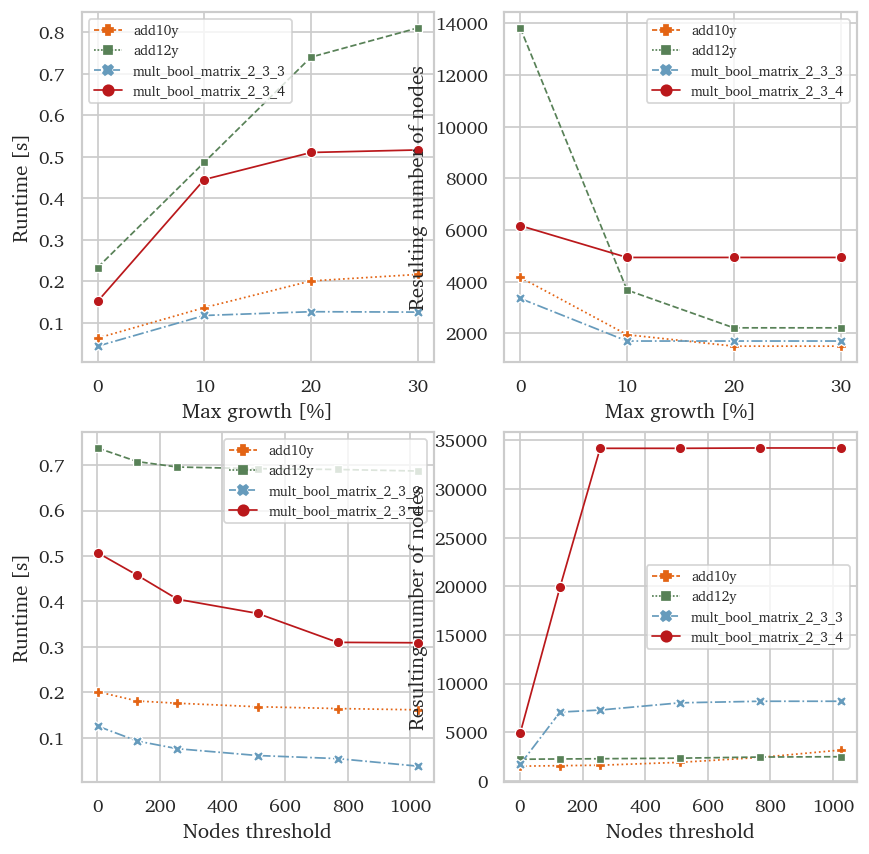

In [49]:
matplotlib.use("TkAgg")
%matplotlib inline
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=125)

hue_order=[f"add10y", f"add12y", f"mult_bool_matrix_2_3_3", f"mult_bool_matrix_2_3_4"]

df = sylvan_regression_max_growth.copy().sort_values(by='model', ascending=False)
add_line_plot(axes[0, 0], df, x="Max growth [%]", y="Runtime [s]", hue_order=hue_order)
add_line_plot(axes[0, 1], df, x="Max growth [%]", y="Resulting number of nodes", hue_order=hue_order)

df = sylvan_regression_nodes_threshold.copy().sort_values(by='model', ascending=False)
add_line_plot(axes[1, 0], df, x="Nodes threshold", y="Runtime [s]", hue_order=hue_order)
add_line_plot(axes[1, 1], df, x="Nodes threshold", y="Resulting number of nodes", hue_order=hue_order)

In [50]:
matplotlib.use("pgf")
axes = plt.figure(figsize=(5, 5))
hue_order=[f"add10y", f"add12y", f"mult_bool_matrix_2_3_3", f"mult_bool_matrix_2_3_4"]
df = sylvan_regression_max_growth.copy().sort_values(by='model', ascending=False)
plt.clf()

line_plot(ax=axes, data=df, x="Max growth [%]", y="Runtime [s]", hue_order=hue_order)
save(plt, results / 'sylvan-regression-max-growth-runtime')

plt.figure(figsize=(5,5))
line_plot(axes, df, x="Max growth [%]", y="Resulting number of nodes", hue_order=hue_order)
save(plt, results / 'sylvan-regression-max-growth-size')

df = sylvan_regression_nodes_threshold.copy().sort_values(by='model', ascending=False)

plt.figure(figsize=(5,5))
line_plot(axes, df, x="Nodes threshold", y="Runtime [s]", hue_order=hue_order)
save(plt, results / 'sylvan-regression-nodes-threshold-runtime')

plt.figure(figsize=(5,5))
line_plot(axes, df, x="Nodes threshold", y="Resulting number of nodes", hue_order=hue_order)
save(plt, results / 'sylvan-regression-nodes-threshold-size')

/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(x=x,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g = sns.lineplot(x=x,
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unk

In [51]:

sylvan_regression_max_growth_table = sylvan_regression_max_growth.drop('workers', axis=1)
sylvan_regression_max_growth_table = sylvan_regression_max_growth_table.drop('max_var', axis=1)
sylvan_regression_max_growth_table = sylvan_regression_max_growth_table.drop('max_swap', axis=1)
sylvan_regression_max_growth_table = sylvan_regression_max_growth_table.drop('reordering_trigger', axis=1)
sylvan_regression_max_growth_table = sylvan_regression_max_growth_table.drop('Nodes threshold', axis=1)

with open(results / 'sylvan_regression_max_growth_table.tex', 'w') as tf:
    tf.write(sylvan_regression_max_growth_table.style.to_latex(convert_css=True))

sylvan_regression_nodes_threshold_table = sylvan_regression_max_growth.drop('workers', axis=1)
sylvan_regression_nodes_threshold_table = sylvan_regression_nodes_threshold_table.drop('max_var', axis=1)
sylvan_regression_nodes_threshold_table = sylvan_regression_nodes_threshold_table.drop('max_swap', axis=1)
sylvan_regression_nodes_threshold_table = sylvan_regression_nodes_threshold_table.drop('reordering_trigger', axis=1)
sylvan_regression_nodes_threshold_table = sylvan_regression_nodes_threshold_table.drop('Max growth [%]', axis=1)

with open(results / 'sylvan_regression_nodes_threshold_table.tex', 'w') as tf:
    tf.write(sylvan_regression_nodes_threshold_table.style.to_latex(convert_css=True))

/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(x=x,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/2160587105.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  g = sns.lineplot(x=x,
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unk

<Figure size 640x480 with 0 Axes>

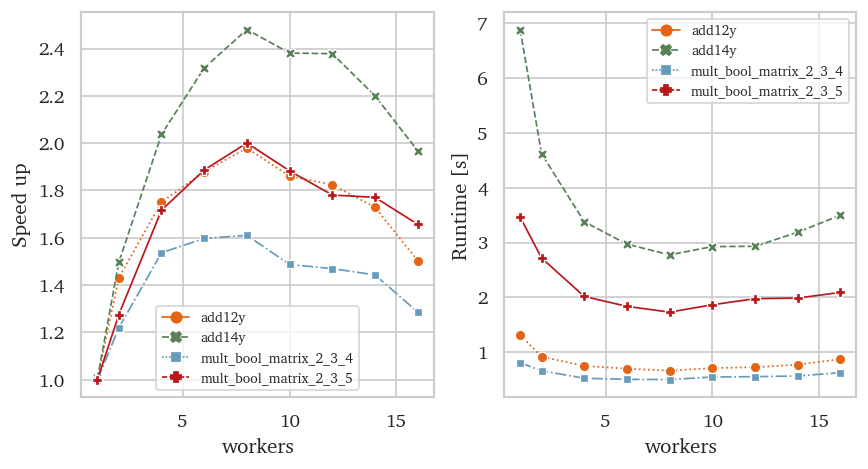

In [52]:
df = sylvan_regression_workers
type = "workers"

hue_order=[f"add12y", f"add14y", f"mult_bool_matrix_2_3_4", f"mult_bool_matrix_2_3_5"]

one_workers = sylvan_regression_workers[sylvan_regression_workers['workers'] == 1]
add10 = one_workers[one_workers['model'] == "add10y"]["Runtime [s]"].mean()
add12 = one_workers[one_workers['model'] == "add12y"]["Runtime [s]"].mean()
add14 = one_workers[one_workers['model'] == "add14y"]["Runtime [s]"].mean()
mult3 = one_workers[one_workers['model'] == "mult_bool_matrix_2_3_3"]["Runtime [s]"].mean()
mult4 = one_workers[one_workers['model'] == "mult_bool_matrix_2_3_4"]["Runtime [s]"].mean()
mult5 = one_workers[one_workers['model'] == "mult_bool_matrix_2_3_5"]["Runtime [s]"].mean()

def calculate_speed_up(row):
    if row["model"] == "add10y":
        return add10 / float(row["Runtime [s]"])
    elif row["model"] == "add12y":
        return add12 / float(row["Runtime [s]"])
    elif row["model"] == "add14y":
        return add14 / float(row["Runtime [s]"])
    elif row["model"] == "mult_bool_matrix_2_3_3":
        return mult3 / float(row["Runtime [s]"])
    elif row["model"] == "mult_bool_matrix_2_3_4":
        return mult4 / float(row["Runtime [s]"])
    elif row["model"] == "mult_bool_matrix_2_3_5":
        return mult5 / float(row["Runtime [s]"])
    else:
        return 0
    
df['Speed up'] = sylvan_regression_workers.apply(calculate_speed_up, axis=1)
df = df[df["model"] != "add10y"]
df = df[df["model"] != "mult_bool_matrix_2_3_3"]
df = df.sort_values(by='model', ascending=True)
matplotlib.use("pgf")
axes = plt.figure(figsize=(4, 4), dpi=125)
ax = line_plot(ax=axes,data=df,x=type, y="Speed up",hue="model", style="model",hue_order=hue_order)
ax.legend(fontsize=8)
save(plt, results / 'sylvan-regression-workers-speed-up')

sylvan_regression_workers_table = df.drop('max_var', axis=1)
sylvan_regression_workers_table = sylvan_regression_workers_table.drop('max_swap', axis=1)
sylvan_regression_workers_table = sylvan_regression_workers_table.drop('reordering_trigger', axis=1)
sylvan_regression_workers_table = sylvan_regression_workers_table.drop('Max growth [%]', axis=1)
sylvan_regression_workers_table = sylvan_regression_workers_table.drop('Nodes threshold', axis=1)

with open(results / 'sylvan_regression_workers_table.tex', 'w') as tf:
    tf.write(sylvan_regression_workers_table.style.to_latex(convert_css=True))
    
matplotlib.use("TkAgg")
%matplotlib inline
plt.clf()
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=125)
ax = add_line_plot(ax=axes[0], data=df,x=type, y="Speed up",hue="model", style="model",hue_order=hue_order)
ax.legend(fontsize=8)
ax = add_line_plot(ax=axes[1], data=df,x=type, y="Runtime [s]",hue="model", style="model",hue_order=hue_order)
ax.legend(fontsize=8)

/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/4269031621.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df,x='Number of nodes', y='Runtime [s]', hue="Task size", style="Task size",
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_82744/4269031621.py:22: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.lineplot(data=df,x='Number of nodes', y='Runtime [s]', hue="Task size", style="Task size",
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring unknown font: Charter
Ignoring 

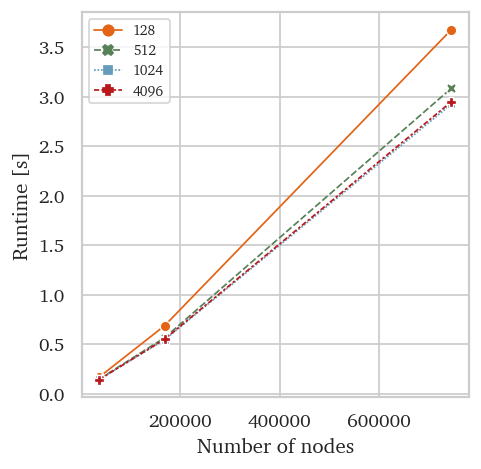

In [55]:
data = [
         [128,     38133,      0.17],
         [128,     169619,     0.690],
         [128,     744993,     3.679],
         [512,     38133,      0.149],
         [512,     169619,     0.568],
         [512,     744993,     3.087],
         [1024,    38133,      0.147],
         [1024,    169619,     0.548],
         [1024,    744993,     2.927],
         [4096,    38133,      0.145],
         [4096,    169619,     0.554],
         [4096,    744993,     2.951]
]

columns = ['Task size', 'Number of nodes', 'Runtime [s]']

df = pd.DataFrame(data=data, columns=columns)

matplotlib.use("pgf")
axes = plt.figure(figsize=(4, 4), dpi=125)
ax = sns.lineplot(data=df,x='Number of nodes', y='Runtime [s]', hue="Task size", style="Task size", 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1.0,
                 ci=None)
ax.legend(fontsize=8)
save(plt, results / 'sylvan-regression-task-size-runtime')

matplotlib.use("TkAgg")
%matplotlib inline
axes = plt.figure(figsize=(4, 4), dpi=125)

ax = sns.lineplot(data=df,x='Number of nodes', y='Runtime [s]', hue="Task size", style="Task size", 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1.0,
                 ci=None)
ax.legend(fontsize=8)